In [1]:
lapply(c("dplyr","Seurat","ggplot2","anndata","readxl",
         "RColorBrewer","reticulate","sceasy","Polychrome", "stringr"),library, character.only = T)
library(glue)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: SeuratObject

Loading required package: sp

'SeuratObject' was built with package 'Matrix' 1.6.5 but the current
version is 1.7.1; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t



Attaching package: 'anndata'


The following object is masked from 'package:SeuratObject':

    Layers



Attaching package: 'readxl'


The following object is masked from 'package:anndata':

    read_excel




[[1]]
[1] "dplyr"     "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[2]]
 [1] "Seurat"       "SeuratObject" "sp"           "dplyr"        "stats"       
 [6] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[11] "base"        

[[3]]
 [1] "ggplot2"      "Seurat"       "SeuratObject" "sp"           "dplyr"       
 [6] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[11] "methods"      "base"        

[[4]]
 [1] "anndata"      "ggplot2"      "Seurat"       "SeuratObject" "sp"          
 [6] "dplyr"        "stats"        "graphics"     "grDevices"    "utils"       
[11] "datasets"     "methods"      "base"        

[[5]]
 [1] "readxl"       "anndata"      "ggplot2"      "Seurat"       "SeuratObject"
 [6] "sp"           "dplyr"        "stats"        "graphics"     "grDevices"   
[11] "utils"        "datasets"     "methods"      "base"        

[[6]]
 [1] "RColorBrewer" "readxl"       "anndata"      "ggplot2"      "Seurat"      
 [6] "SeuratObject" "sp"           "dplyr"        "stats"        "graphics"    
[11] "grDevices"    "utils"        "datasets"     "methods"      "base"        

[[7]]
 [1] "reticulate"   "RColorBrewer" "readxl"       "anndata"      "ggplot2"     
 [6] "Seurat"       "SeuratObject" "sp"           "dplyr"        "stats"       
[11] "graphics"     "grDevices"    "utils"        "datasets"     "methods"     
[16] "base"        

[[8]]
 [1] "sceasy"       "reticulate"   "RColorBrewer" "readxl"       "anndata"     
 [6] "ggplot2"      "Seurat"       "SeuratObject" "sp"           "dplyr"       
[11] "stats"        "graphics"     "grDevices"    "utils"        "datasets"    
[16] "methods"      "base"        

[[9]]
 [1] "Polychrome"   "sceasy"       "reticulate"   "RColorBrewer" "readxl"      
 [6] "anndata"      "ggplot2"      "Seurat"       "SeuratObject" "sp"          
[11] "dplyr"        "stats"        "graphics"     "grDevices"    "utils"       
[16] "datasets"     "methods"      "base"        

[[10]]
 [1] "stringr"      "Polychrome"   "sceasy"       "reticulate"   "RColorBrewer"
 [6] "readxl"       "anndata"      "ggplot2"      "Seurat"       "SeuratObject"
[11] "sp"           "dplyr"        "stats"        "graphics"     "grDevices"   
[16] "utils"        "datasets"     "methods"      "base"

In [59]:
library(Rsubread)
library(tximport)
library(DESeq2)
library(data.table)
library(edgeR)
library(tidyr)
library(tibble)

In [18]:
data_dir = "/xchip/beroukhimlab/srangasw/POMT/data/bulk/counts"
samples = list.files(data_dir)

In [4]:
dt_list <- list()
for (i in 1:length(samples)){
    sample_dir = paste(data_dir, samples[[i]], sep = "/" )
    txt_files <- list.files(sample_dir, pattern = "\\.txt$")
    file_path = paste(sample_dir, txt_files, sep = "/")
    dt <- read.table(file_path)
    print(colnames(dt))
    var_name <- glue("dt_{i}")
    assign(var_name, dt)
    dt_list[[i]] <- dt
}

[1] "X20241230_pomt1_neg_1_JR12700_S145" "genes"                             
[1] "X20241230_pomt1_neg_2_JR12700_S147" "genes"                             
[1] "X20241230_pomt1_neg_3_JR12700_S149" "genes"                             
[1] "X20241230_pomt1_pos_1_JR12700_S146" "genes"                             
[1] "X20241230_pomt1_pos_2_JR12700_S148" "genes"                             
[1] "X20241230_pomt1_pos_3_JR12700_S150" "genes"                             
[1] "X20241230_rosa26_neg_1_JR12700_S139" "genes"                              
[1] "X20241230_rosa26_neg_2_JR12700_S141" "genes"                              
[1] "X20241230_rosa26_neg_3_JR12700_S143" "genes"                              
[1] "X20241230_rosa26_pos_1_JR12700_S140" "genes"                              
[1] "X20241230_rosa26_pos_2_JR12700_S142" "genes"                              
[1] "X20241230_rosa26_pos_3_JR12700_S144" "genes"                              


In [5]:
library(data.table)
merged_dt <- dt_1
for  (i in 2:length(samples)){
    merged_dt <- merge(merged_dt, dt_list[[i]], by = "genes", all = TRUE)}
head(merged_dt)

,genes,X20241230_pomt1_neg_1_JR12700_S145,X20241230_pomt1_neg_2_JR12700_S147,X20241230_pomt1_neg_3_JR12700_S149,X20241230_pomt1_pos_1_JR12700_S146,X20241230_pomt1_pos_2_JR12700_S148,X20241230_pomt1_pos_3_JR12700_S150,X20241230_rosa26_neg_1_JR12700_S139,X20241230_rosa26_neg_2_JR12700_S141,X20241230_rosa26_neg_3_JR12700_S143,X20241230_rosa26_pos_1_JR12700_S140,X20241230_rosa26_pos_2_JR12700_S142,X20241230_rosa26_pos_3_JR12700_S144
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0610005C13Rik,11,12,10,9,20,15,10,9,8,6,11,14
2,0610006L08Rik,0,0,0,0,0,0,0,0,1,0,0,0
3,0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
4,0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
5,0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
6,0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929


In [6]:
rownames(merged_dt) <- merged_dt$genes
merged_dt$genes <- NULL
head(merged_dt)

,X20241230_pomt1_neg_1_JR12700_S145,X20241230_pomt1_neg_2_JR12700_S147,X20241230_pomt1_neg_3_JR12700_S149,X20241230_pomt1_pos_1_JR12700_S146,X20241230_pomt1_pos_2_JR12700_S148,X20241230_pomt1_pos_3_JR12700_S150,X20241230_rosa26_neg_1_JR12700_S139,X20241230_rosa26_neg_2_JR12700_S141,X20241230_rosa26_neg_3_JR12700_S143,X20241230_rosa26_pos_1_JR12700_S140,X20241230_rosa26_pos_2_JR12700_S142,X20241230_rosa26_pos_3_JR12700_S144
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
0610005C13Rik,11,12,10,9,20,15,10,9,8,6,11,14
0610006L08Rik,0,0,0,0,0,0,0,0,1,0,0,0
0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929


In [12]:
gfp_counts <- merged_dt["EGFP", ]
write.csv(merged_dt, "/xchip/beroukhimlab/srangasw/POMT/data/bulk/bulk_RNA_merged.csv")
write.csv(gfp_counts, "/xchip/beroukhimlab/srangasw/POMT/data/bulk/bulk_RNA_gfp.csv")

## Preprocessing and QC

In [63]:
dt <- read.csv("/xchip/beroukhimlab/srangasw/POMT/data/bulk/bulk_RNA_merged.csv")

In [64]:
setnames(dt, 'X', 'gene_name')

In [65]:
colnames(dt) <- sub("^X", "", colnames(dt))
colnames(dt) <- sub("^[^_]*_([^_]*_.*)_[^_]*$", "\\1", colnames(dt))
head(dt)

,gene_name,pomt1_neg_1_JR12700,pomt1_neg_2_JR12700,pomt1_neg_3_JR12700,pomt1_pos_1_JR12700,pomt1_pos_2_JR12700,pomt1_pos_3_JR12700,rosa26_neg_1_JR12700,rosa26_neg_2_JR12700,rosa26_neg_3_JR12700,rosa26_pos_1_JR12700,rosa26_pos_2_JR12700,rosa26_pos_3_JR12700
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0610005C13Rik,11,12,10,9,20,15,10,9,8,6,11,14
2,0610006L08Rik,0,0,0,0,0,0,0,0,1,0,0,0
3,0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
4,0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
5,0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
6,0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929


In [68]:
colnames(dt) <- c('gene_name', 'pomt1Neg_1', 'pomt1Neg_2', 'pomt1Neg_3', 
                  'pomt1Pos_1','pomt1Pos_2', 'pomt1Pos_3', 'rosa26Neg_1',
                  'rosa26Neg_2','rosa26Neg_3','rosa26Pos_1',
                  'rosa26Pos_2', 'rosa26Pos_3')
head(dt)

,gene_name,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0610005C13Rik,11,12,10,9,20,15,10,9,8,6,11,14
2,0610006L08Rik,0,0,0,0,0,0,0,0,1,0,0,0
3,0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
4,0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
5,0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
6,0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929


### Filtering lowly expressed genes

In [131]:
# Normalize count table to CPM 
counttablematrix <- dt %>%
  select(-gene_name) %>%
  as.matrix()

row.names(counttablematrix) <- dt$gene_name
counttable_cpm <- cpm(counttablematrix)

head(counttable_cpm)

,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
0610005C13Rik,0.1978916,0.2758823,0.2317155,0.1519894,0.4794370,0.3415846,0.1636363,0.2048449,0.2055248,0.1177914,0.2654158,0.2594725
0610006L08Rik,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0000000,0.0256906,0.0000000,0.0000000,0.0000000
0610009B22Rik,13.2767246,13.1503906,14.0187854,12.0409402,14.0954466,15.0297213,12.3872646,13.2238746,14.3867337,14.3312898,15.9973343,14.5119285
0610009E02Rik,0.1439211,0.2758823,0.3244016,0.3884174,0.5273807,0.4326738,0.2945453,0.2276054,0.4110495,0.2159509,0.7238613,0.3336076
0610009L18Rik,0.4317634,0.2988725,0.5097740,0.6586209,0.6951836,0.3871292,0.4254543,0.6828162,1.4129828,1.0601228,1.0375345,0.9637552
0610010F05Rik,58.7378127,57.6364146,55.2873089,49.6836551,51.5874170,54.1753135,57.2235990,61.7493488,55.3889249,54.2625820,50.1635866,54.2853623


In [132]:
dim(counttablematrix)

[1] 32246    12

In order for a gene to be retained, it needs to have a count of 0.6 in CPM. mycutoff shows what the threshold for each sample is in terms of raw counts, accounting for differences in library size.

In [133]:
dt %>%
  select(-gene_name) %>%
  purrr::modify(~sum(.)) %>% 
  distinct() %>%
  gather(library, counts) %>%  # split library column into dataset and protocol
  mutate(millionreads = counts/(10^6)) %>%
  mutate(cpmThreshold = 15/millionreads) %>%
  mutate(mycutoff = 0.3 * millionreads)

library,counts,millionreads,cpmThreshold,mycutoff
<chr>,<int>,<dbl>,<dbl>,<dbl>
pomt1Neg_1,55585999,55.58600,0.2698521,16.67580
pomt1Neg_2,43496807,43.49681,0.3448529,13.04904
pomt1Neg_3,43156378,43.15638,0.3475732,12.94691
pomt1Pos_1,59214645,59.21464,0.2533157,17.76439
pomt1Pos_2,41715599,41.71560,0.3595777,12.51468
pomt1Pos_3,43912990,43.91299,0.3415846,13.17390
rosa26Neg_1,61111151,61.11115,0.2454544,18.33335
rosa26Neg_2,43935686,43.93569,0.3414081,13.18071
rosa26Neg_3,38924749,38.92475,0.3853589,11.67742


In [134]:
subsetting_matrix <- counttable_cpm > 0.3
head(subsetting_matrix)

,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
0610005C13Rik,FALSE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
0610006L08Rik,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
0610009B22Rik,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
0610009E02Rik,FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,TRUE,TRUE
0610009L18Rik,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE
0610010F05Rik,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


In [135]:
subsetting_vector <- rowSums(subsetting_matrix) >= 3
head(subsetting_vector)

0610005C13Rik 0610006L08Rik 0610009B22Rik 0610009E02Rik 0610009L18Rik 
        FALSE         FALSE          TRUE          TRUE          TRUE 
0610010F05Rik 
         TRUE

In [136]:
counttablematrix_filt <- counttablematrix[subsetting_vector,]
counttablematrix_filt_cpm <- cpm(counttablematrix_filt)
dim(counttablematrix_filt_cpm)

[1] 17740    12

In [137]:
mydgelist <- DGEList(counttablematrix_filt)

In [76]:
head(mydgelist$counts)

,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929
0610010K14Rik,479,365,369,548,421,484,507,411,347,492,537,604
0610012G03Rik,581,491,475,592,431,544,657,520,431,533,421,607


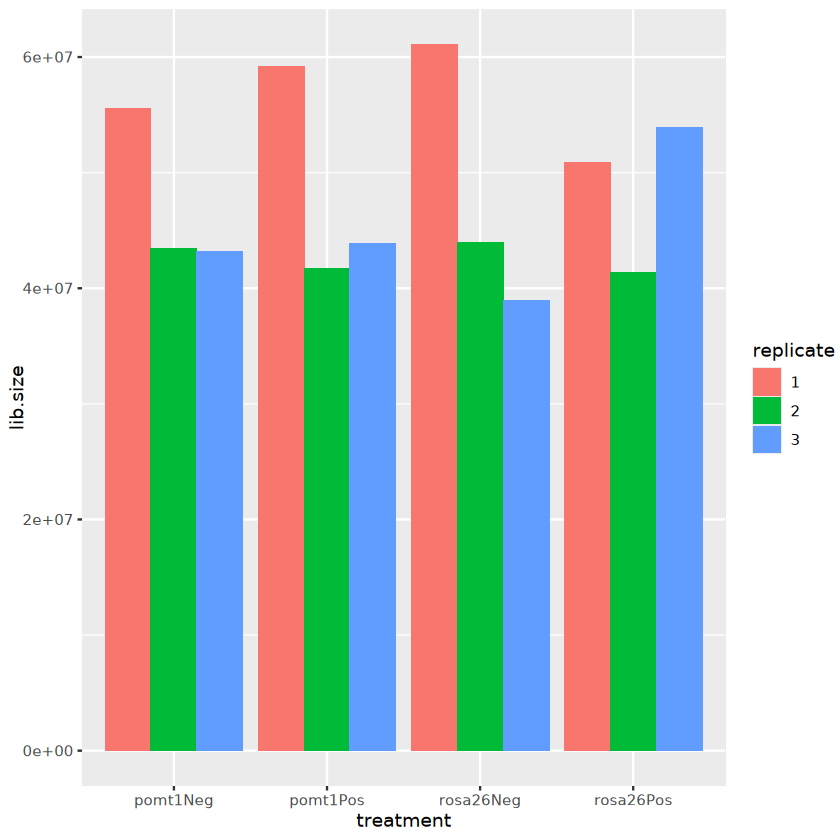

In [138]:
# Visualization of library size after scaling up to counts oper million 
mydgelist$samples %>% 
  as.data.frame() %>%
  rownames_to_column() %>%
  separate(rowname, into = c("treatment", "replicate"), sep="_") %>%
  ggplot(aes(y = lib.size, x = treatment, fill = replicate)) +geom_bar(stat = "identity", position = "dodge") 

## Dim Reduction 

Allows us to check whether most of the variability in the data is due to the treatment conditions 

In [79]:
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [80]:
mydgelist_cpm <- cpm(mydgelist, log = TRUE)

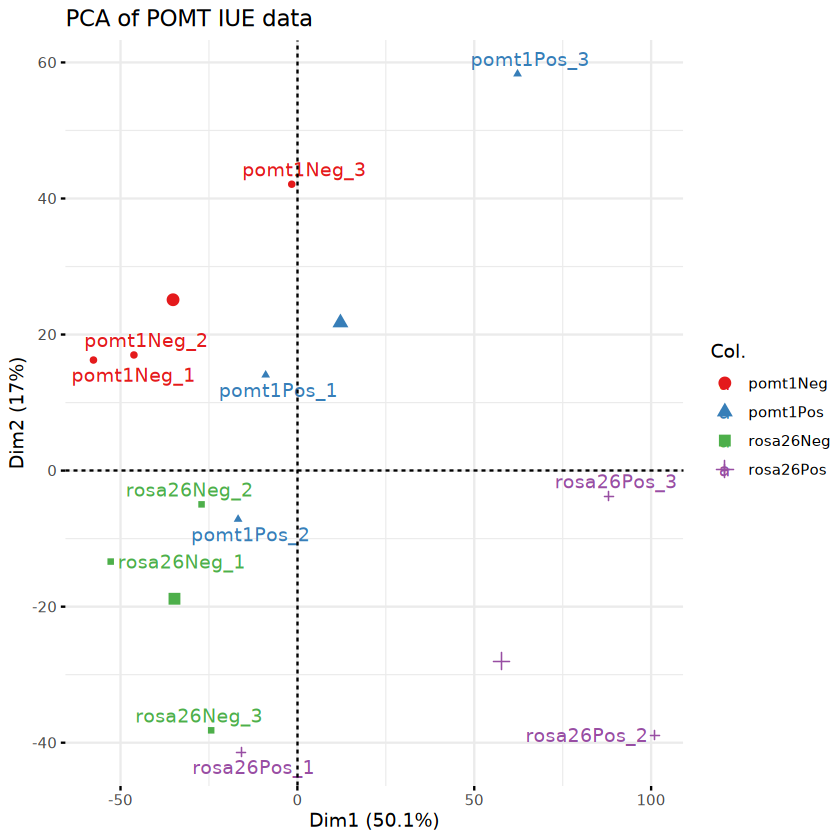

In [82]:
res.pca <- prcomp(t(mydgelist_cpm))
colors <- as.factor(str_split(rownames(mydgelist$samples), "_", simplify = TRUE)[,1])
fviz_pca_ind(res.pca,
             col.ind = colors,
             palette = "Set1",
             repel = TRUE,    # Avoid text overlapping
             title = "PCA of POMT IUE data"
             )

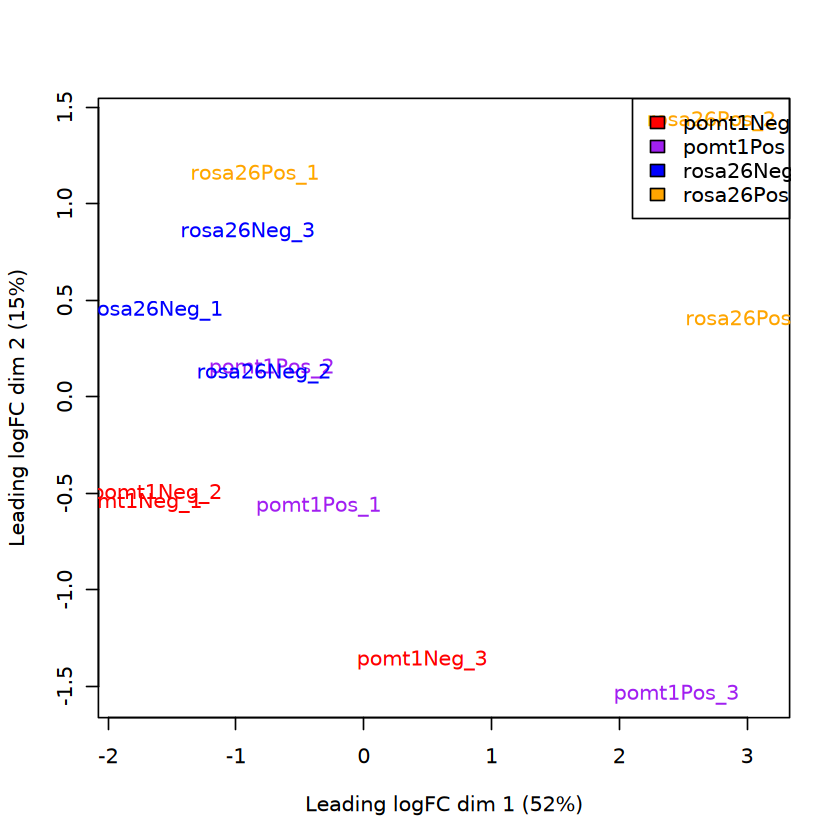

In [84]:
plotMDS(mydgelist,col= c("red","purple","blue","orange")[colors])
legend("topright",fill=c("red","purple","blue","orange"),legend=levels(colors))

### Hierarchical Clustering of most variable genes

In [86]:
most_var_genes <- sort(apply(mydgelist_cpm, 1, var), decreasing=TRUE)[1:500]
mydgelist_cpm_most_var <- mydgelist_cpm[most_var_genes,]

In [90]:
head(mydgelist_cpm_most_var)

,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
1110020A21Rik,-1.134428,-1.063096,-0.7989323,-0.9582894,-0.5882839,-0.5096675,-1.315771,-0.3346071,-0.9160056,-0.9089072,0.3490428,-0.6133432
1110008P14Rik,6.060043,6.651183,6.4744581,6.3581887,6.0967614,6.2064409,6.334072,6.5301280,5.6419522,6.1933957,5.5180174,6.3491524
1110002E22Rik,1.305188,1.621851,1.7667978,1.3556032,1.0895432,1.3875906,2.239758,2.3623518,1.3709096,1.8066241,1.4707163,1.5715356
1110002E22Rik,1.305188,1.621851,1.7667978,1.3556032,1.0895432,1.3875906,2.239758,2.3623518,1.3709096,1.8066241,1.4707163,1.5715356
1110002E22Rik,1.305188,1.621851,1.7667978,1.3556032,1.0895432,1.3875906,2.239758,2.3623518,1.3709096,1.8066241,1.4707163,1.5715356
1110002E22Rik,1.305188,1.621851,1.7667978,1.3556032,1.0895432,1.3875906,2.239758,2.3623518,1.3709096,1.8066241,1.4707163,1.5715356


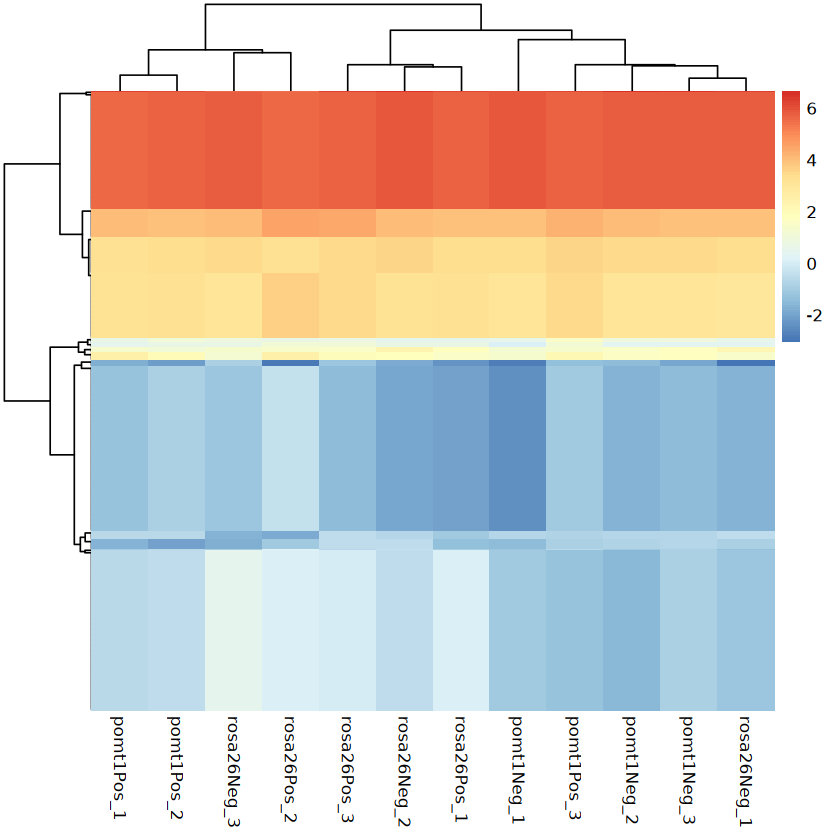

In [88]:
library(pheatmap)
# Shows expression in terms of log2 expression level
pheatmap(mydgelist_cpm_most_var, show_rownames  = FALSE)

## DGEA

In [139]:
head(counttablematrix_filt)

,pomt1Neg_1,pomt1Neg_2,pomt1Neg_3,pomt1Pos_1,pomt1Pos_2,pomt1Pos_3,rosa26Neg_1,rosa26Neg_2,rosa26Neg_3,rosa26Pos_1,rosa26Pos_2,rosa26Pos_3
0610009B22Rik,738,572,605,713,588,660,757,581,560,730,663,783
0610009E02Rik,8,12,14,23,22,19,18,10,16,11,30,18
0610009L18Rik,24,13,22,39,29,17,26,30,55,54,43,52
0610010F05Rik,3265,2507,2386,2942,2152,2379,3497,2713,2156,2764,2079,2929
0610010K14Rik,479,365,369,548,421,484,507,411,347,492,537,604
0610012G03Rik,581,491,475,592,431,544,657,520,431,533,421,607


In [140]:
colors <- as.factor(str_split(rownames(mydgelist$samples), "_", simplify = TRUE)[,1])
conditions <- c("pomt1Neg", "pomt1Neg", "pomt1Neg", 
                "pomt1Pos", "pomt1Pos", "pomt1Pos", "rosa26Neg", "rosa26Neg", 
                "rosa26Neg", "rosa26Pos", "rosa26Pos", "rosa26Pos")

In [141]:
levels(colors)

[1] "pomt1Neg"  "pomt1Pos"  "rosa26Neg" "rosa26Pos"

In [142]:
dds <- DESeqDataSetFromMatrix(countData=counttablematrix_filt, colData=DataFrame(conditions), design= ~conditions)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
"some variables in design formula are characters, converting to factors"


In [143]:
dds

class: DESeqDataSet 
dim: 17740 12 
metadata(1): version
assays(1): counts
rownames(17740): 0610009B22Rik 0610009E02Rik ... mt-Nd5 mt-Nd6
rowData names(0):
colnames(12): pomt1Neg_1 pomt1Neg_2 ... rosa26Pos_2 rosa26Pos_3
colData names(1): conditions

In [144]:
dds$conditions <- factor(dds$conditions, levels = c('pomt1Neg', 'pomt1Pos', 'rosa26Neg', 'rosa26Pos'))

In [148]:
dds <- DESeq(dds)

using pre-existing size factors

estimating dispersions

found already estimated dispersions, replacing these

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [153]:
levels(dds$conditions)

[1] "pomt1Neg"  "pomt1Pos"  "rosa26Neg" "rosa26Pos"

In [157]:
res1 <- results(dds, name="conditions_pomt1Pos_vs_pomt1Neg")
res1

log2 fold change (MLE): conditions pomt1Pos vs pomt1Neg 
Wald test p-value: conditions pomt1Pos vs pomt1Neg 
DataFrame with 17740 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
0610009B22Rik  658.2033      -0.041330 0.0994631 -0.415531 0.6777534  0.961388
0610009E02Rik   16.7958       0.805051 0.5473398  1.470844 0.1413334  0.781820
0610009L18Rik   33.4337       0.426303 0.4800171  0.888099 0.3744876  0.901680
0610010F05Rik 2622.3490      -0.206918 0.0927550 -2.230806 0.0256940  0.437221
0610010K14Rik  458.3187       0.182456 0.1094829  1.666524 0.0956091  0.725448
...                 ...            ...       ...       ...       ...       ...
mt-Nd3          38472.5     -0.1540158  0.168183 -0.915765  0.359790  0.897195
mt-Nd4         374989.1     -0.0681148  0.239337 -0.284598  0.775952  0.973943
mt-Nd4l         48668.3     -0.1087256  0.247837 -0.438697  0

In [159]:
res2 <- results(dds, name= "conditions_rosa26Neg_vs_pomt1Neg")
res2

log2 fold change (MLE): conditions rosa26Neg vs pomt1Neg 
Wald test p-value: conditions rosa26Neg vs pomt1Neg 
DataFrame with 17740 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat    pvalue      padj
              <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
0610009B22Rik  658.2033    -0.06377113 0.0996952 -0.639661 0.5223929  0.959592
0610009E02Rik   16.7958     0.28928538 0.5610788  0.515588 0.6061423  0.972882
0610009L18Rik   33.4337     0.94312467 0.4725859  1.995668 0.0459701  0.633412
0610010F05Rik 2622.3490    -0.02086806 0.0926080 -0.225338 0.8217166  0.988380
0610010K14Rik  458.3187     0.00938228 0.1105175  0.084894 0.9323456  0.995132
...                 ...            ...       ...       ...       ...       ...
mt-Nd3          38472.5      -0.326569  0.168191  -1.94166 0.0521784  0.664075
mt-Nd4         374989.1      -0.358677  0.239338  -1.49862 0.1339719  0.825414
mt-Nd4l         48668.3      -0.386947  0.247844  -1.56125 

#### Misc

In [ ]:
   # fc_PEO_RNA <- featureCounts(files=sample_path, annot.ext='/xchip/beroukhimlab/srangasw/POMT/genome/mouse/genes/updated.genes.gtf',isGTFAnnotationFile=TRUE, nthread=32, GTF.featureType="exon", GTF.attrType="gene_id", useMetaFeatures=TRUE, isPairedEnd=T)
    # merged_dt <- merge(fc_PEO_RNA$counts, gene_ids_map, by="row.names", all=TRUE)
    # merged_dt[["V1"]] <- NULL
    # rownames(merged_dt) <- merged_dt$Row.names
    # merged_dt$Row.names <- NULL
    # setnames(merged_dt, "V2", "gene_name")